## Step 1: Preprocessing Data

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://charity-funding-predictor-hm21.s3.us-east-2.amazonaws.com/charity_data.csv")
application_df.head(26)
application_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


## Step 1

In [2]:
# List dataframe data types
application_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

## 1.2 Drop EIN and NAME columns

In [3]:
#  Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
features_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
features_df.head()
features_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Generate our categorical variable lists with objects or strings.
application_cat = features_df.dtypes[features_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

## 1.3 Determine unique values of each column

In [5]:
# Check the number of unique values in each column
features_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

## 1.4 Find data points for Application_type and Classification

In [6]:
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

## 1.5 Use the number of data points for each unique values to pick a cutoff poin to bin "rare" categorical variables together in a new value, "Other", and then check if the binning was successful.


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9','T13','T12','T2','T25','T14','T15','T29','T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# NOw we look at column CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Now, choose a cutoff value and create a list of CLASSIFICATION to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ['C2700', 'C7000', 'C7200','C1700', 'C4000', 'C7100', 'C2800', 'C6000', 'C1238','C5000', 'C7120', 'C1800', 'C4100', 'C1400', 'C1270', 'C2300','C8200', 'C1500', 'C7210', 'C1300', 'C1230', 'C1280', 'C1240','C2710', 'C2561', 'C1250', 'C8000', 'C1245', 'C1260', 'C1235','C1720', 'C1257', 'C4500', 'C2400', 'C8210', 'C1600', 'C1278','C1237', 'C4120', 'C2170', 'C1728', 'C1732', 'C2380', 'C1283','C1570', 'C2500', 'C1267', 'C3700', 'C1580', 'C2570', 'C1256','C1236', 'C1234', 'C1246', 'C2190', 'C4200', 'C0', 'C3200','C5200', 'C1370', 'C2600', 'C1248', 'C6100', 'C1820', 'C1900','C2150']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

## 1.6 Use pd.get_dummies() function to encode categorical variables.

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummies = pd.get_dummies(features_df)
app_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
y = app_dummies['IS_SUCCESSFUL']
X = app_dummies.drop(['IS_SUCCESSFUL'],axis=1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_features = len(X_train_scaled[0])
hidden_nodes_layer_1 =  80
hidden_nodes_layer2 = 30


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=number_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                9360      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,821
Trainable params: 11,821
Non-trainable params: 0
_________________________________________________________________


## 2.7 Compile and train the model.

In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.7176
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7272
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7305
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7286
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7283
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7298
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7308
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.7315
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5464 - accuracy: 0.7306
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5455 - accura

## 2.9 Evaluate the model using the test data to determine the loss/errors and accuracy.

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5556 - accuracy: 0.7380 - 278ms/epoch - 1ms/step
Loss: 0.5556324124336243, Accuracy: 0.7379592061042786


## 2.10 Save and export your results to an HDF5 file. Name the file AlphabetSoupCharity.h5.

In [18]:
# Export our model to HDF5 file
history_df = pd.DataFrame(fit_model.history)
history_df.to_hdf('Resources/AlphabetSoupCharity.h5','df',mode='w',format='table')

## Step 3: Optimize the Model

#### Figure 1 - Plot of loss and accuracy

<AxesSubplot:>

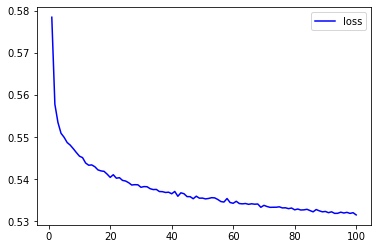

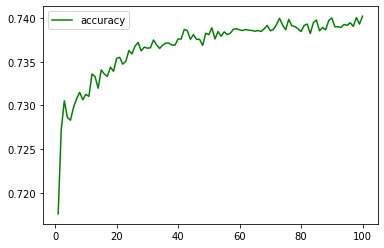

In [19]:
# Create a DataFrame containing Training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index +=1

# Plot the loss
history_df.plot(y="loss", color='blue')
history_df.plot(y="accuracy", color='green')